In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "AnnualIncome": [15, 16, 17, 28, 30, 45, 55, 60, 65, 70],
    "SpendingScore": [39, 81, 6, 77, 40, 76, 6, 94, 3, 72],
    "Age": [19, 21, 20, 23, 24, 30, 32, 33, 35, 36],
}


In [6]:
df = pd.DataFrame(data)

In [7]:
df

,CustomerID,AnnualIncome,SpendingScore,Age
0,1,15,39,19
1,2,16,81,21
2,3,17,6,20
3,4,28,77,23
4,5,30,40,24
5,6,45,76,30
6,7,55,6,32
7,8,60,94,33
8,9,65,3,35
9,10,70,72,36


In [9]:
from sklearn.cluster import KMeans

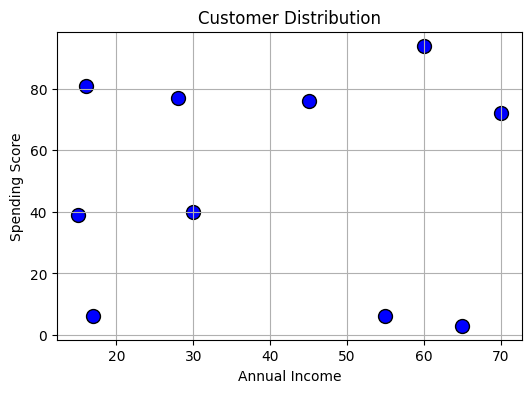

In [10]:
x=df[['AnnualIncome','SpendingScore']]
plt.figure(figsize=(6,4))
plt.scatter(x['AnnualIncome'],x['SpendingScore'],s=100,c='blue',edgecolors='k')
plt.title('Customer Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

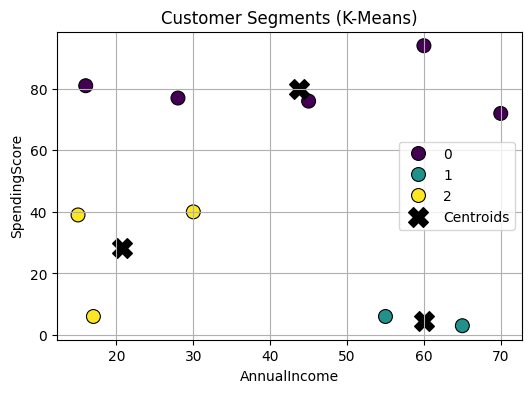

In [14]:
X = df[['AnnualIncome', 'SpendingScore']]
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis', s=100, edgecolor='k')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segments (K-Means)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print(df.groupby('Cluster').mean())

         CustomerID  AnnualIncome  SpendingScore   Age
Cluster                                               
0               6.0     43.800000      80.000000  28.6
1               8.0     60.000000       4.500000  33.5
2               3.0     20.666667      28.333333  21.0


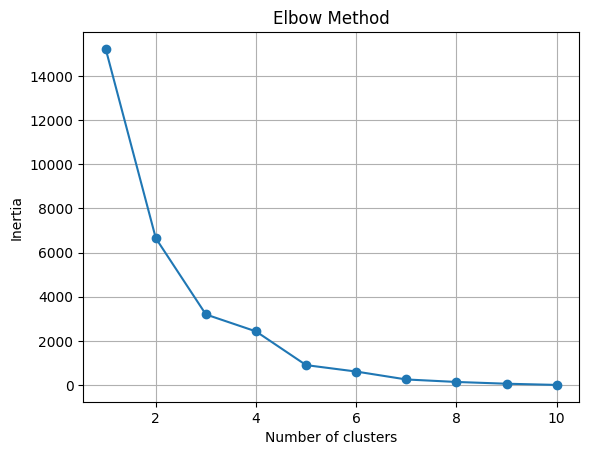

In [16]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [17]:
X = df[['AnnualIncome', 'SpendingScore', 'Age']]


In [18]:
df = pd.read_csv(r"C:\Users\muthu\Downloads\clustered_customers.csv")


In [19]:
df

,CustomerID,AnnualIncome,SpendingScore,Age,Cluster
0,1,15,39,19,2
1,2,16,81,21,0
2,3,17,6,20,2
3,4,28,77,23,0
4,5,30,40,24,2
5,6,45,76,30,0
6,7,55,6,32,1
7,8,60,94,33,0
8,9,65,3,35,1
9,10,70,72,36,0
